# Multi-Objective Optimization Benchmarking
This notebook analyzes the performance of NSGA-II and SMS-EMOA on DTLZ1, DTLZ2, and DTLZ4 problems using:
- Dominated Hypervolume (HV)
- Inverted Generational Distance (IGD)
- Convergence plots over generations

All results are based on 30 independent runs per setting.

## Imports & Setup

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Set style
sns.set(style="whitegrid")

## Load and Display Summary CSV

In [23]:
df = pd.read_csv("../results/indicators/summary.csv")
df.head()

,problem,algo,seed,HV,IGD
0,dtlz1,NSGA2,0,1.697245,0.028396
1,dtlz1,NSGA2,1,1.698587,0.027356
2,dtlz1,NSGA2,2,1.698476,0.026715
3,dtlz1,NSGA2,3,1.697285,0.028267
4,dtlz1,NSGA2,4,1.698370,0.027833


## Data Summary

In [24]:
# Replace your current data summary cell with this enhanced version
print("EXPERIMENTAL RESULTS SUMMARY")
print("=" * 80)
print("Multi-Objective Optimization Algorithm Performance Analysis")
print("Problems: DTLZ1, DTLZ2, DTLZ4 | Algorithms: NSGA-II, SMS-EMOA | Runs: 30")
print("=" * 80)

# Create formatted summary table
summary_stats = df.groupby(['problem', 'algo']).agg({
    'HV': ['mean', 'std', 'min', 'max'],
    'IGD': ['mean', 'std', 'min', 'max']
}).round(6)

print("\nTABLE 1: Performance Indicators Summary")
print("-" * 80)
print(f"{'Problem':<8} {'Algorithm':<10} {'HV Mean':<10} {'HV Std':<10} {'IGD Mean':<10} {'IGD Std':<10}")
print("-" * 80)

for prob in ['dtlz1', 'dtlz2', 'dtlz4']:
    for algo in ['NSGA2', 'SMS_EMOA']:
        hv_mean = summary_stats.loc[(prob, algo), ('HV', 'mean')]
        hv_std = summary_stats.loc[(prob, algo), ('HV', 'std')]
        igd_mean = summary_stats.loc[(prob, algo), ('IGD', 'mean')]
        igd_std = summary_stats.loc[(prob, algo), ('IGD', 'std')]
        
        print(f"{prob.upper():<8} {algo:<10} {hv_mean:<10.4f} {hv_std:<10.4f} {igd_mean:<10.4f} {igd_std:<10.4f}")
    print("-" * 80)

print("\nTABLE 2: Statistical Analysis")
print("-" * 60)
print(f"{'Problem':<8} {'Metric':<6} {'Best Algorithm':<15} {'Improvement':<12}")
print("-" * 60)

for prob in ['dtlz1', 'dtlz2', 'dtlz4']:
    # Hypervolume analysis (higher is better)
    nsga2_hv = summary_stats.loc[(prob, 'NSGA2'), ('HV', 'mean')]
    sms_hv = summary_stats.loc[(prob, 'SMS_EMOA'), ('HV', 'mean')]
    hv_best = 'NSGA-II' if nsga2_hv > sms_hv else 'SMS-EMOA'
    hv_improvement = abs(nsga2_hv - sms_hv) / min(nsga2_hv, sms_hv) * 100
    
    # IGD analysis (lower is better)
    nsga2_igd = summary_stats.loc[(prob, 'NSGA2'), ('IGD', 'mean')]
    sms_igd = summary_stats.loc[(prob, 'SMS_EMOA'), ('IGD', 'mean')]
    igd_best = 'NSGA-II' if nsga2_igd < sms_igd else 'SMS-EMOA'
    igd_improvement = abs(nsga2_igd - sms_igd) / max(nsga2_igd, sms_igd) * 100
    
    print(f"{prob.upper():<8} {'HV':<6} {hv_best:<15} {hv_improvement:<8.2f}%")
    print(f"{'':<8} {'IGD':<6} {igd_best:<15} {igd_improvement:<8.2f}%")
    print("-" * 60)

print("\nTABLE 3: Algorithm Robustness Analysis")
print("-" * 70)
print(f"{'Problem':<8} {'Algorithm':<10} {'HV CV(%)':<10} {'IGD CV(%)':<10} {'Stability':<12}")
print("-" * 70)

for prob in ['dtlz1', 'dtlz2', 'dtlz4']:
    for algo in ['NSGA2', 'SMS_EMOA']:
        hv_mean = summary_stats.loc[(prob, algo), ('HV', 'mean')]
        hv_std = summary_stats.loc[(prob, algo), ('HV', 'std')]
        igd_mean = summary_stats.loc[(prob, algo), ('IGD', 'mean')]
        igd_std = summary_stats.loc[(prob, algo), ('IGD', 'std')]
        
        # Coefficient of Variation (CV) = std/mean * 100
        hv_cv = (hv_std / hv_mean) * 100 if hv_mean > 0 else 0
        igd_cv = (igd_std / igd_mean) * 100 if igd_mean > 0 else 0
        
        # Stability assessment
        stability = 'High' if hv_cv < 1 and igd_cv < 10 else 'Medium' if hv_cv < 5 and igd_cv < 50 else 'Low'
        
        print(f"{prob.upper():<8} {algo:<10} {hv_cv:<10.2f} {igd_cv:<10.2f} {stability:<12}")
    print("-" * 70)

EXPERIMENTAL RESULTS SUMMARY
Multi-Objective Optimization Algorithm Performance Analysis
Problems: DTLZ1, DTLZ2, DTLZ4 | Algorithms: NSGA-II, SMS-EMOA | Runs: 30

TABLE 1: Performance Indicators Summary
--------------------------------------------------------------------------------
Problem  Algorithm  HV Mean    HV Std     IGD Mean   IGD Std   
--------------------------------------------------------------------------------
DTLZ1    NSGA2      1.6982     0.0007     0.0277     0.0010    
DTLZ1    SMS_EMOA   1.6654     0.0732     0.0714     0.1028    
--------------------------------------------------------------------------------
DTLZ2    NSGA2      1.0990     0.0061     0.0730     0.0031    
DTLZ2    SMS_EMOA   1.1537     0.0002     0.0658     0.0012    
--------------------------------------------------------------------------------
DTLZ4    NSGA2      1.1077     0.0072     0.0688     0.0029    
DTLZ4    SMS_EMOA   0.9431     0.2820     0.3104     0.3069    
-------------------------

## Boxplot

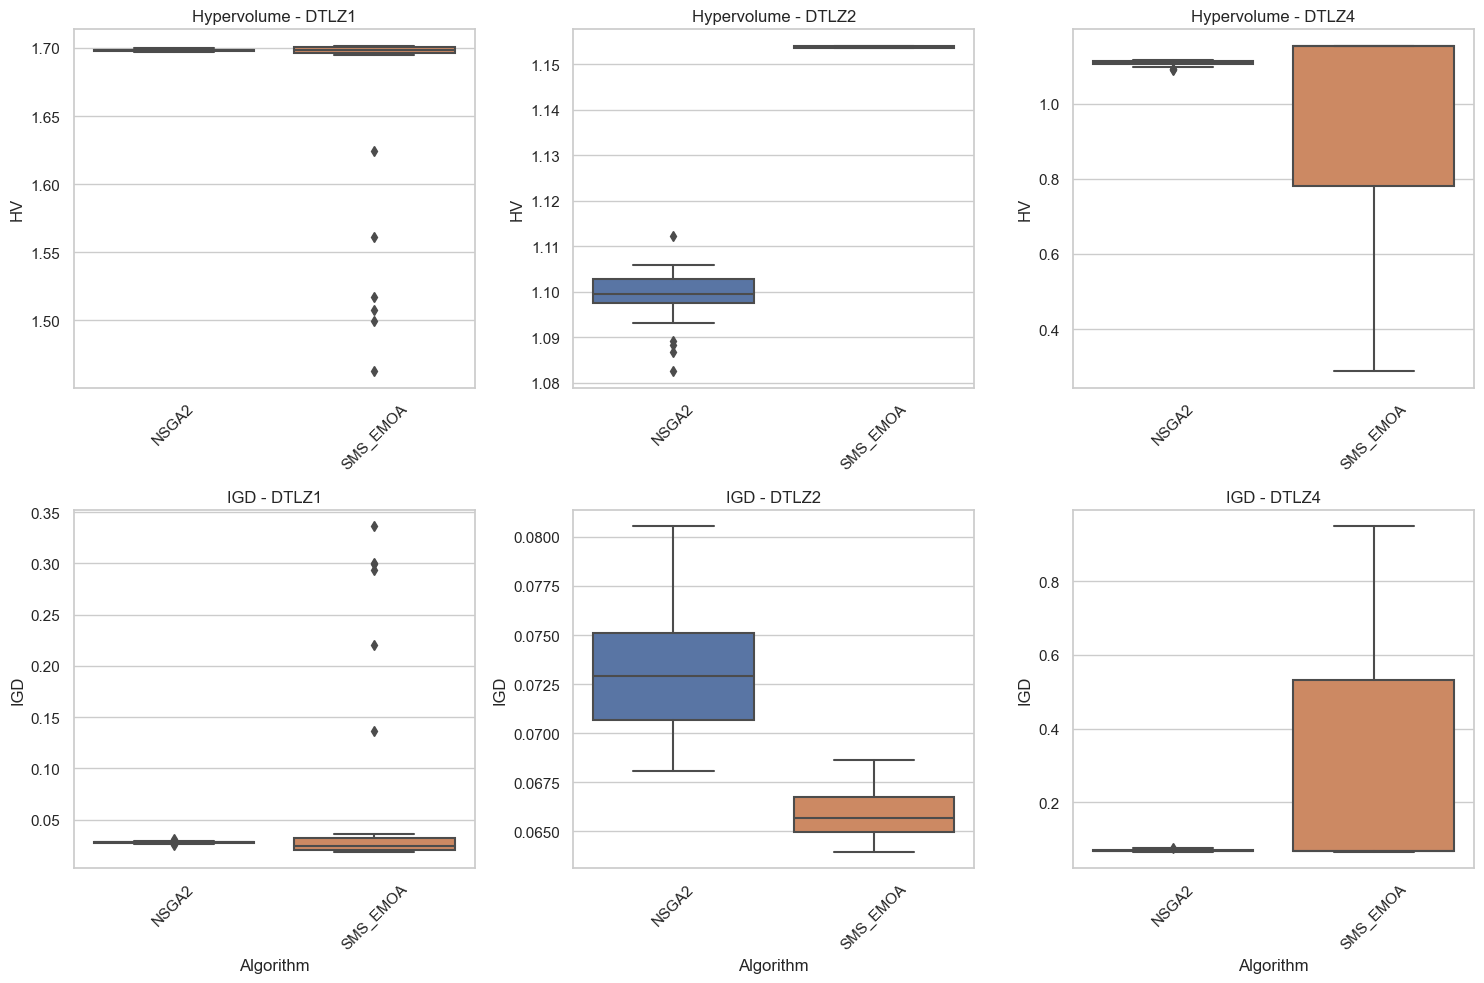

In [25]:
# Create separate subplots for better visibility
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

problems = ["dtlz1", "dtlz2", "dtlz4"]

# Hypervolume plots (top row)
for i, prob in enumerate(problems):
    prob_data = df[df['problem'] == prob]
    sns.boxplot(data=prob_data, x="algo", y="HV", ax=axes[0, i])
    axes[0, i].set_title(f"Hypervolume - {prob.upper()}")
    axes[0, i].set_xlabel("")
    axes[0, i].tick_params(axis='x', rotation=45)

# IGD plots (bottom row)
for i, prob in enumerate(problems):
    prob_data = df[df['problem'] == prob]
    sns.boxplot(data=prob_data, x="algo", y="IGD", ax=axes[1, i])
    axes[1, i].set_title(f"IGD - {prob.upper()}")
    axes[1, i].set_xlabel("Algorithm")
    axes[1, i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig("../results/plots/boxplots_separate.png", dpi=300, bbox_inches='tight')
plt.show()

## Load HV Convergence History

In [26]:
def load_hv_histories(problem, algorithm, path="../results/raw", runs=30):
    histories = []
    for seed in range(runs):
        file = os.path.join(path, f"{problem}_{algorithm}_{seed}_hv_hist.npz")
        try:
            hv_hist = np.load(file)["hv_hist"]
            histories.append(hv_hist)
        except FileNotFoundError:
            print(f"Missing: {file}")
    return histories

## Plot Convergence Curve

In [27]:
def plot_convergence(problem, algorithms=["NSGA2", "SMS_EMOA"], runs=30):
    plt.figure(figsize=(8, 5))
    for algo in algorithms:
        hvs = load_hv_histories(problem, algo, runs=runs)
        if not hvs:
            continue
        min_len = min(len(hv) for hv in hvs)
        hvs = np.array([hv[:min_len] for hv in hvs])
        mean = hvs.mean(axis=0)
        std = hvs.std(axis=0)
        plt.plot(mean, label=algo)
        plt.fill_between(range(min_len), mean - std, mean + std, alpha=0.3)
    
    plt.title(f"Convergence Plot for {problem.upper()}")
    plt.xlabel("Generation")
    plt.ylabel("Hypervolume")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"../results/plots/{problem}_convergence.png", dpi=300)
    plt.show()

## Generate Convergence Plots

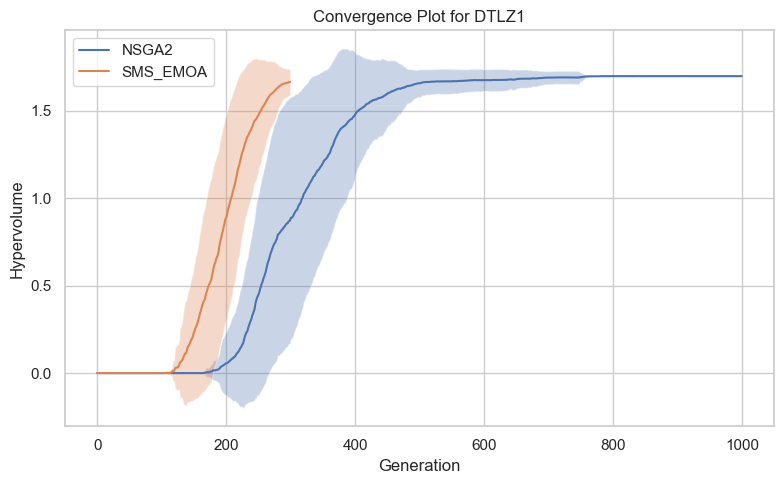

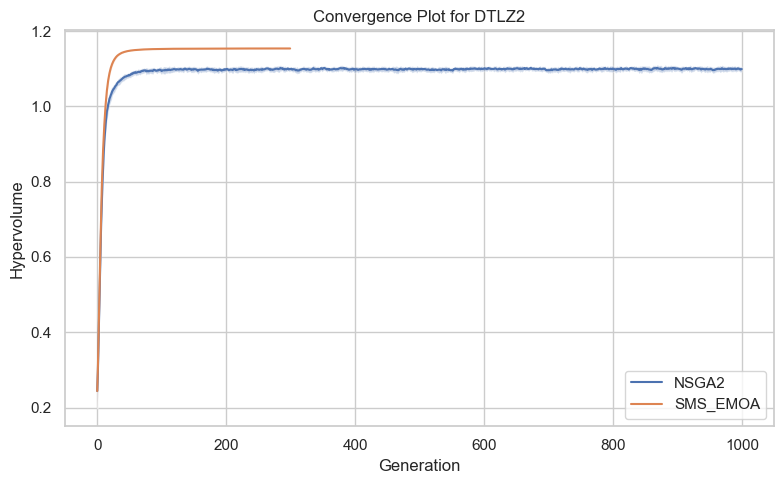

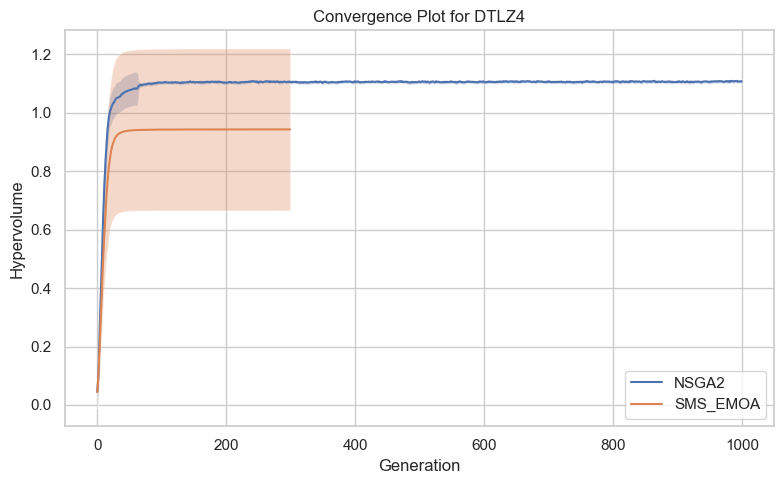

In [28]:
for prob in ["dtlz1", "dtlz2", "dtlz4"]:
    plot_convergence(prob)